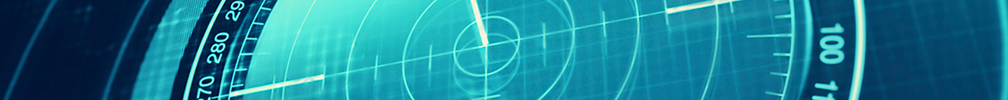

# Week 6 Overview
What if you could build a model that mimics the way humans make choices—one step at a time, evaluating options as we go? This week, we’ll explore decision trees, a powerful technique in ML that does exactly that. Decision trees break down complex data into a series of decision points, making them intuitive to understand and accurate in both regression and classification tasks.

We’ll start by reviewing the basic structure of a tree and how it splits data. Then, we’ll look at regression trees, looking at real-world examples like the Boston Housing dataset. Along the way, we’ll examine how tree complexity affects model performance and learn strategies for managing that complexity, ensuring our models generalize well to new data. By the end of the week, you’ll have the skills to create and evaluate decision trees using sklearn, understanding both their strengths and limitations.

## Key Terms
- **Regression Tree:** A type of decision tree used to predict continuous target values, where the prediction at each leaf node is the average of the target values in that node.
- **Classification Tree:** A type of decision tree used to predict categorical labels, where the prediction at each leaf node is the most common class label.
- **Split:** A point where the data is divided into two or more subsets based on the value of a feature.
- **Recursive Binary Splitting:** The process by which a decision tree algorithm divides data into two subsets at each node based on a feature and a threshold
- **Impurity:** A measure of how mixed the target values are in a node. In regression trees, impurity is often measured by the MSE in classification trees, but Gini Impurity
- **Pruning:** The process of trimming branches from a decision tree to reduce complexity and improve generalization to new data
- **Tree Pruning:** The technique of removing nodes from a fully grown tree to simplify the model and prevent overfitting
- **Maximum Depth:** A hyperparameter that limits how deep the tree can grow, which helps control the complexity and prevent overfitting
- **Minimum Samples per Leaf:** A hyperparameter that sets the minimum number of data points that must be in a leaf node to allow a split, controlling tree complexity
- **Feature Importance:**  A measure of how much a given feature contributes to reducing the impurity in a decision tree, helping identify the most influential features

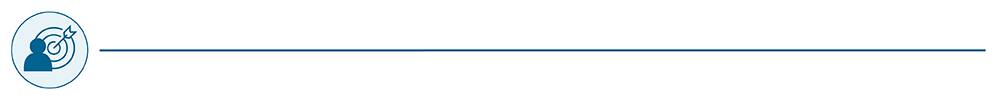

### Learning Objectives
By the end of this week, you will be able to:
- Describe the structure of decision trees (nodes, branches, depth, size, leaves)
- Explain how decision trees split data
- Explain how decision trees limit their size by limiting depth, leaf size, or pruning
- Analyze the impact of tree complexity on model performance, such as overfitting and underfitting
- Apply the appropriate functions in scikit-learn

## 6.1 Lesson: Decision Trees
A **decision tree** is a type of machine learning model that makes decisions based on a series of questions about the data, where each "question" leads to a specific outcome. 

Decision trees are a versatile model that can handle both regression (predicting continuous values) and classification (predicting discrete labels). This lesson will focus on regression trees, which aim to predict a continuous target variable by splitting the data based on feature values.

First, let’s review the **basic terminology of trees** in computer science (notice that they grow downwards!):

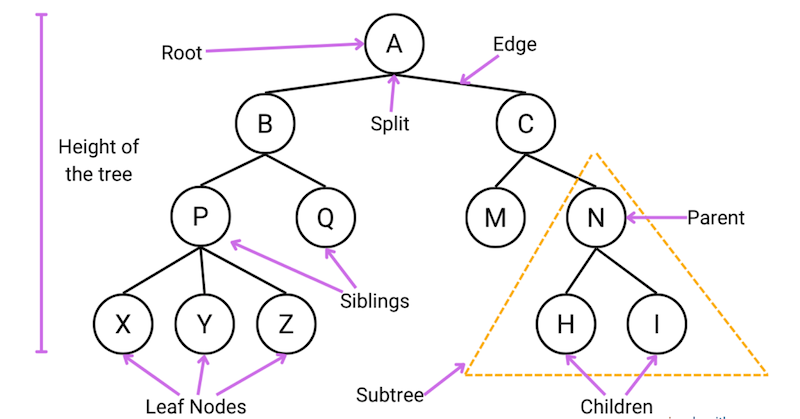

A simple example of a decision tree is one that you might use when deciding whether to take a new job. Here is a Classification Decision Tree to help you!

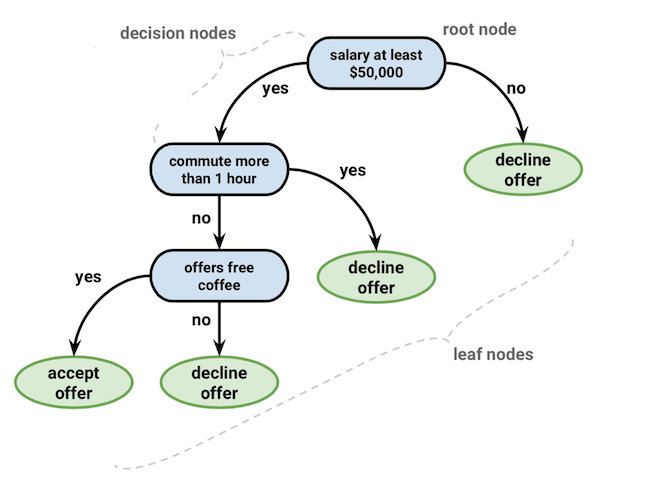

In this lesson, we’ll focus on regression trees and return to the idea of Classification Decision Trees in Week 8.

### The How and Why of Regression Decision Trees
**Decision Tree Structure:** Regression trees split the data into subsets at each node by posing a Boolean condition based on one of the features. For example, a node might ask, "Is the number of rooms greater than 5?" when predicting house prices. The tree continues splitting the data recursively until it meets a stopping criterion, such as a minimum number of samples per leaf or a maximum tree depth. This stepwise approach allows the model to adapt to the structure of the data. After the tree is built, it may be pruned to improve its predictions.

**Making Predictions:** Making a prediction for a given input $x_0$, simply consists in following the appropriate path down the tree to a leaf node. Once the tree has been built, each leaf node contains a subset of the data.

The prediction from a leaf node is the **average** of the target variable (e.g., house prices) for the data points in that leaf. For instance, if a leaf node contains 10 houses, the prediction will be the average price of those 10. Unlike classification trees that predict discrete labels, regression trees predict continuous values.

**Performing Inference:** Regression trees provide intuitive interpretations of the data. Each split represents a simple decision based on a feature, much like how a person would make decisions. For example, if the tree splits based on "number of rooms" and then "distance to city center," it can reveal how different factors influence house prices. As long as the trees are not too large, they mirror the way humans think, making them easy to understand.

Before we proceed, let’s look at a simple example of how a decision tree works for regression using the Boston Housing Dataset.

There is (unfortunately) an inverse relationship in this dataset between the feature `lstat` (the proportion of the population in the neighborhood that has a lower socioeconomic status) and `medv` (median value in 1000’s of dollars). Here is a quadratic polynomial regression on this data.

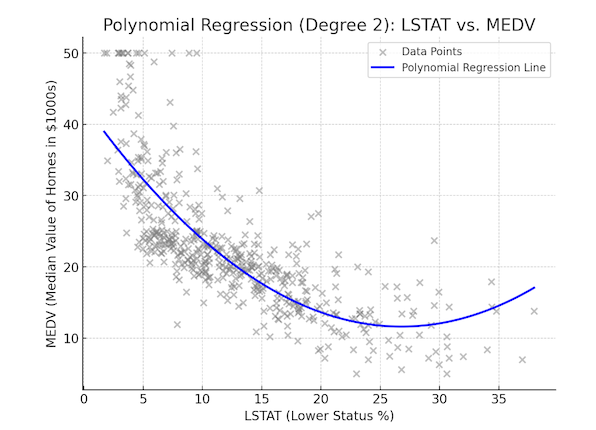

Instead of doing a polynomial regression on this dataset, we will examine a simple decision tree. To make a prediction for an `lstat` value $x$, we start at the top of the tree. At each interior node, a decision rule of the form $x < c$ is applied, where $c$ is a threshold value. If the condition is true, we move to the left; otherwise, we go to the right. This process continues until we reach a leaf node, which represents the predicted `medv`. 

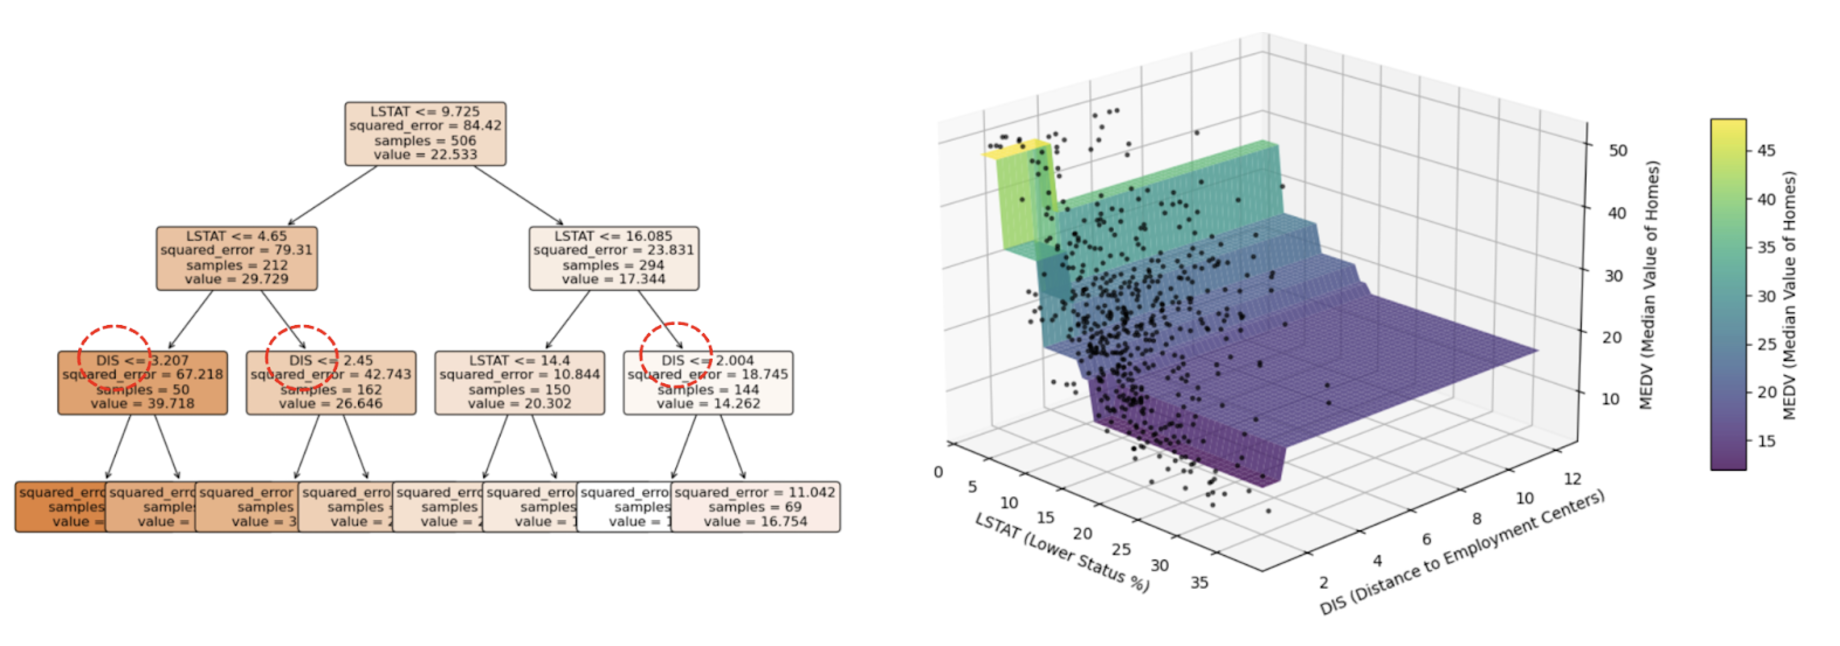

The tree creates a partition of the predictor space (in this case, `lstat`) into disjoint regions. The plot on the right shows the resulting blocks in the partition as vertical lines, with each block corresponding to a constant prediction (shown by the red steps) for `medv`, the target variable. These leaf values are the average of all `medv` values in the block. The decision tree simplifies the relationship between `lstat` and `medv` into these stepwise predictions.

### Think about it
- Why might a decision tree be easier to interpret compared to other machine learning models like neural networks or polynomial regression? How does this impact its use in real-world applications?
- Imagine you are using a decision tree to predict house prices. What might be some advantages of splitting the data at certain features (e.g., 'number of rooms' or 'distance to city center') over others (e.g., ‘driveway length’ or ‘house color’)?
- How does a decision tree’s ability to split the data recursively allow it to capture complex patterns? Can you think of a scenario where this might be especially useful?
- What are some potential limitations of decision trees? For example, how might they handle noisy data or outliers?
- What factors would you consider when deciding how deep a decision tree should be? How might the depth of the tree affect its performance?

## 6.2 Lesson: Constructing Decision Trees
When building decision trees, there are several key considerations:
- How do we decide where to split the data?
- When should we stop splitting?
- What are the pros and cons of this technique?
- How can we prevent underfitting and overfitting?

### Splitting the Data: 
The decision tree uses an **impurity metric**, such as $\text{MSE}$ for regression trees or **Gini impurity** for classification trees, to determine where to split the data. At each node, the algorithm selects the feature and threshold that result in the greatest reduction in impurity.

Specifically, the reduction in impurity is calculated as the parent MSE, minus the weighted average of the MSEs of the children, i.e., if the split produces children with $m_{left}$ and $m_{right}$ data points, then

$$\text{Reduction in Impurity} \quad = \quad \text{MSE(Parent)} - \biggl( \frac{m_L}{m_{total}} \cdot \text{MSE (L Child)} + \frac{m_R}{m_{total}} \cdot \text{MSE (R Child)} \biggl)$$

The tree recursively splits the data at each leaf node, creating new children leaf nodes. This process continues until the data can no longer be split based on the desired **stopping criteria**, which may include:
- **Maximum tree depth:** Limits how deep the tree can grow, helping to control complexity
- **Minimum samples per leaf:** Ensures that splits only occur when there is enough data to support them
- **Minimum impurity decrease:** Splits are only made when they lead to a significant reduction in impurity

### Procs and Cons of Decision Trees
As with any ML model, decision trees come with advantages and disadvantages that have to be balanced when considering them for your project. Strong advantages include the following:
- **Interpretability:** Decision trees are easy to understand and explain because each split corresponds to a logical decision based on feature values, much like how a human might reason. They work well with both categorical and numerical data, and there's no need for feature scaling or normalization, unlike models such as linear regression or neural networks.
- **Handling Complex Interactions and Feature Dependencies:** Unlike polynomial regression, which is limited to fitting specific non-linear terms (i.e., of the form $X_k$) of individual features, decision trees can adapt to more complex relationships. We’ll return to this important consideration in the next lesson.

Decision trees, like any machine learning model, face the same Bias-Variance Tradeoff of any ML model:
- **Underfitting (High Bias):** Shallow trees may be too simple and fail to capture important patterns in the data.
- **Overfitting (High Variance):** Deep trees can become overly complex, capturing noise instead of meaningful trends.

Managing the tradeoff involves the careful design of stopping criteria and a post-build step of pruning the tree, trimming branches that don’t provide much predictive power, simplifying the model, and enhancing generalization.

By understanding the construction process and the caveats that come with the technique, you can build models that are both interpretable and robust, generalizing well to new data. Let’s take a look at the Boston Housing Dataset in detail, building decision trees in `sklearn`.

### Think About it
- How does the choice of impurity metric (e.g., MSE for regression, Gini impurity for classification) affect where the decision tree splits the data?
- Why might setting a maximum tree depth help prevent overfitting? What trade-offs should you consider when choosing this parameter?
- If a decision tree consistently makes poor predictions on new, unseen data, what changes might you consider in its construction process to improve generalization?
- How do decision trees handle complex interactions between features differently from models like linear regression or polynomial regression? Why might this be an advantage in certain datasets?

## 6.3 Lesson: Decision Trees for Higher-Dimensional Data
The real power of decision trees is revealed when applied to datasets with multiple features. Decision trees excel at capturing complex, non-linear interactions between features, even when those features aren’t independent. Each split in a decision tree is based on a single feature, but by making multiple splits at different levels, the tree can uncover intricate relationships. For example, imagine predicting house prices: a tree might first split on the number of rooms, then, within each group, split again on proximity to the city center. This flexibility allows the tree to model how the effect of one feature (like location) depends on another (like size), something that might be difficult to achieve with polynomial regression alone. This adaptability makes decision trees versatile for datasets with more complex and layered relationships between variables.

Let’s add another feature from the Boston Housing Dataset to our example above. `dis` represents the weighted average distance to five Boston employment centers. Higher values mean a property is farther from job hubs, while lower values indicate closer proximity, helping to assess how distance affects housing prices.

Now the decision tree can split based on either `lstat` or `dis`.

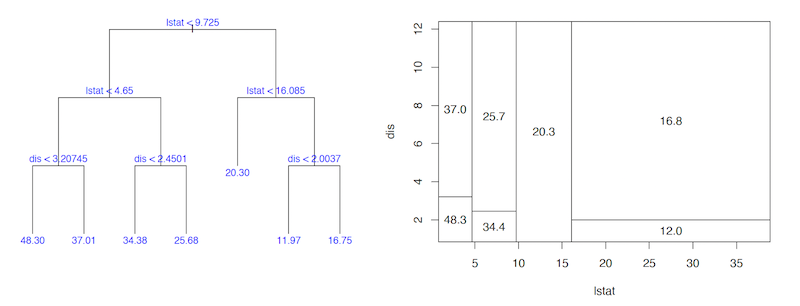

The right side shows the partition of the feature space, corresponding to the leaf nodes of the tree. Each region and leaf displays the average `medv` for the data points assigned to that area. 

Notice how adding a feature increases the complexity of the partition. Here is a 3D view of the same partition, showing the `medv` values:

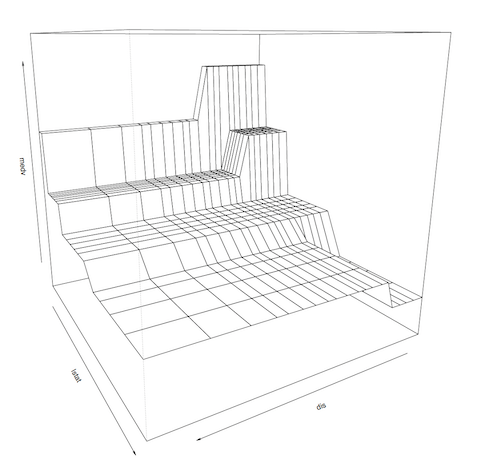

This graphic shows the regression function produced by the decision tree. The model creates a step function, which may appear simplistic, but it effectively captures non-linear relationships and interactions between variables. Decision trees can handle many variables, adapting flexibly to the data structure. Notice how the effect of `dis` (distance to employment centers) changes depending on `lstat` (lower status percentage). This interaction reveals that `dis` influences house prices differently across various levels of `lstat`, something that linear models might struggle to capture.

When a 3D dataset is based on geographical features such as longitude and latitude, displaying the partition as a map can be a vivid way to enhance the interpretability of the results!

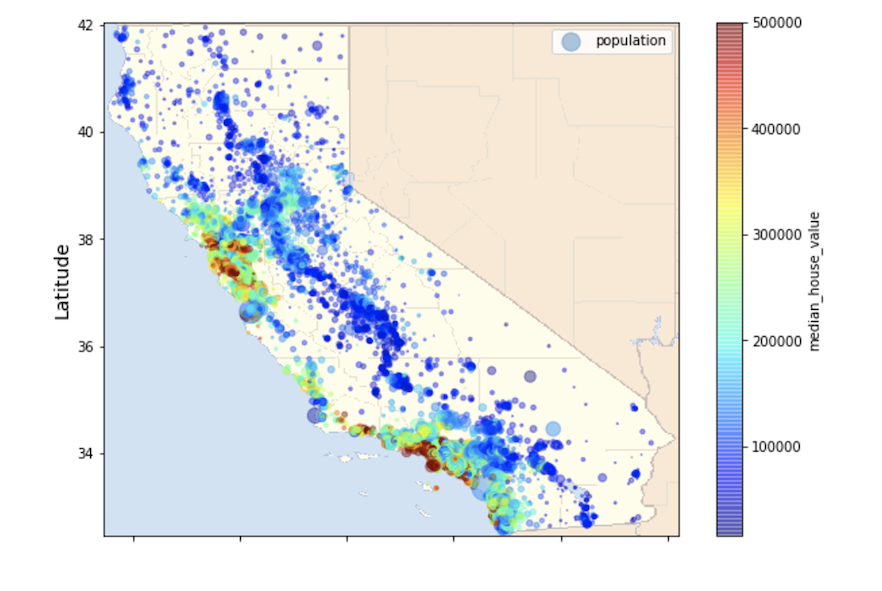

When a dataset contains dozens or even hundreds of features, there is a bewildering complexity of possible interactions between variables. The decision tree can account for these interactions, with a possible loss of interpretability by a human!

When a dataset has dozens or even hundreds of features, the potential interactions between variables can become highly complex and difficult to decipher. Decision trees are capable of capturing these intricate interactions by splitting individual features at different levels of the tree. However, as the tree grows deeper to account for more interactions, the model can become harder for a human to interpret.

Let’s dig into the Boston Housing dataset more and see what we can discover!

### Think About It
- Higher-dimensional decision trees create partitions in multi-dimensional space, not just along a single axis. What challenges might arise when visualizing and interpreting these splits, and how can this affect your understanding of the model's predictions?
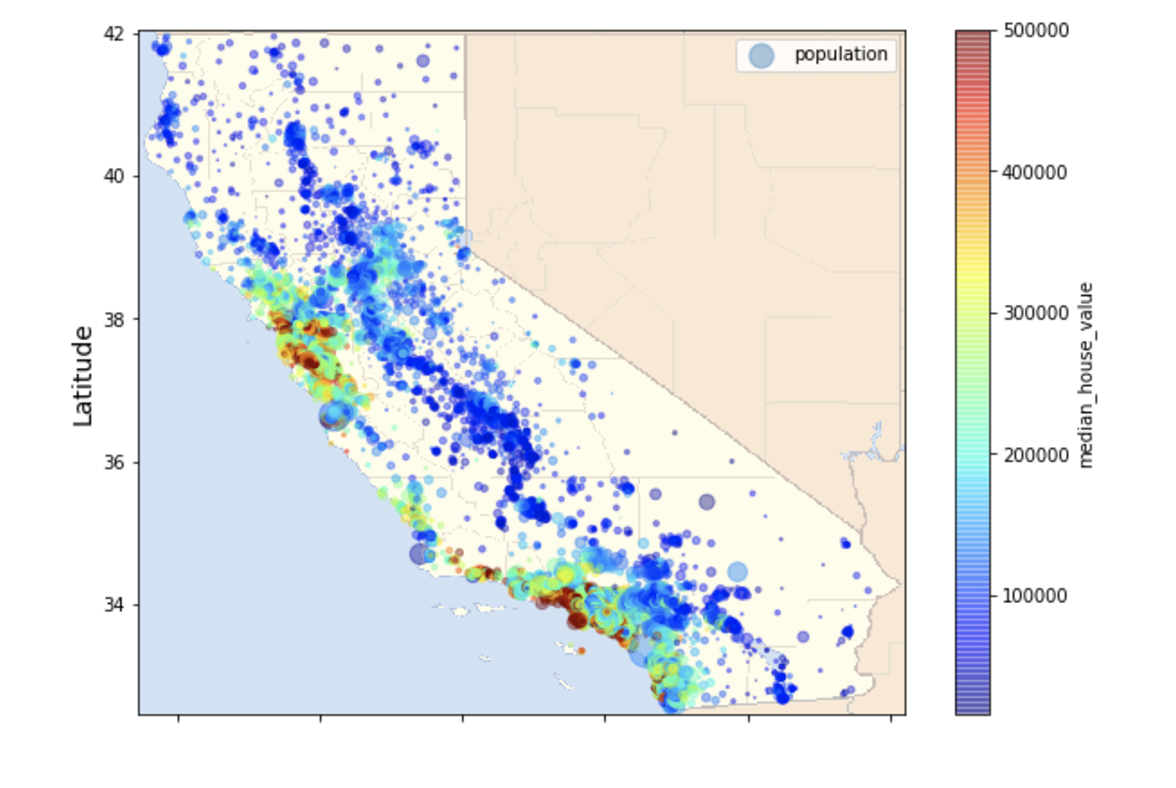

## 6.4 Lesson: Pruning Decision Trees
Building effective decision trees requires balancing complexity and simplicity to avoid overfitting or underfitting the data. We’ll now explore how to construct, optimize, and prune decision trees, focusing on the key concepts of loss, complexity, and the bias-variance trade-off.

### Fitting Decision Trees
To fit a decision tree to our data, we start by building a large tree that can capture detailed patterns in the training data. **The complexity of a tree is typically measured by the number of bottom nodes (leaves)**. While a larger tree may provide a better fit, it can also lead to overfitting, where the model learns noise rather than the underlying patterns.

In order to control the complexity of a decision tree, the tree-building process minimizes this cost function:

$ \text{cost}(T, y) \quad = \quad \text{loss}(T, y) + \alpha \cdot \text{ number of leaves in } T$

where

- **$\text{loss(T, y)}$** measures how well the tree $T$ fits the data $y$. For regression, this could be the sum of squared errors.
- $\alpha$ is a parameter that penalizes complexity. Higher values of $\alpha$ encourage simpler trees, while lower values allow for more complex trees.

### Growing and Pruning Trees
**Step 1:** Grow a Big Tree
- Start with a single node and recursively split the data to build a large tree. At each step, choose the split that maximizes the reduction in loss.
- Stop growing the tree when a predefined criterion is met, such as having a minimum number of samples in each leaf.

**Step 2:** Prune Back the Tree

Pruning involves tirmming branches form the large tree to find a smaller, more generalizable model.
- at each step, evaluate paris of leaves and remove those that contribute the least ot the overall performance, according to the cost function.
- This produces a sequence of subtrees. The optimal subtree is chosen based on the value of $\alpha$ that minimizes the cost function.

### The Role of the Complexity-Cost Parameter $\alpha$
The parameter $\alpha$ acts as a tuning parameter, much like $k$ in k-Nearest Neighbors or $\lambda$ in regularization methods for regression. It controls the trade-off between model complexity and performance. 
- Larger $\alpha$ values lead to simpler smaller trees by increasing the penalty on complexity, effectively pruning branches and reducing the risk of overfitting.
- Smaller $\alpha$ values allow the tree to grow deeper and capture more details in the data, but this increases the risk of overfitting, as the model might start learning noise rather than true patterns.

To find the **best** \alpha$, we typically use grid search combined with cross-validation. This involves specifying a range of possible $\alpha$ and for each candidate $\alpha$, the model's performance is evaluated using K-Fold Cross Validation, and the $\alpha$ that results in the lowest average error across the folds is selected as the optimal parameter. By performing this earch, we can balance the model's ability to generalize wihtout making it overly complex or too simple. 

To return to our housing dataset, the diagrams below show three deicions trees generated using different $\alpha$ values across the entire dataset. Smaller $\alpha$ values apply a lower penalty for complexity, resulting in larger, more detailed trees. The top tree is a simplified version of the middle tree, while the middle tree is a simplified version of the bottom one. The middle tree, produced with $\alpha = 0.005$.  $\alpha = 0.005$ was identified as the optimal model through cross-validation. 

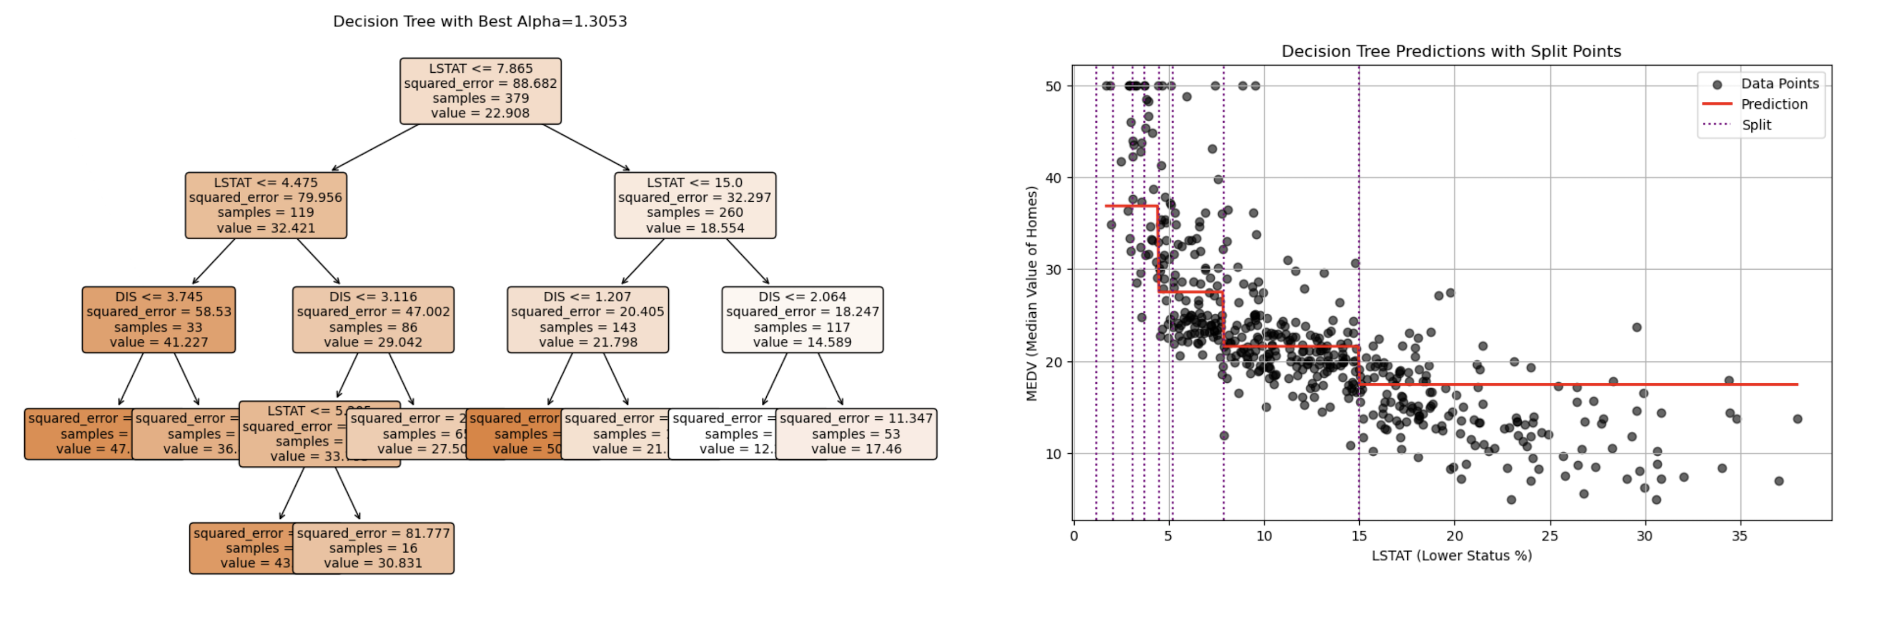

Building effective decision trees is about finding the right balance between complexity and generalization. By carefully choosing the complexity-cost parameter $\alpha$ and using pruning techniques, we can create models that accurately capture patterns without overfitting.